# **WAOWS6 – Customer Clustering dengan K-Means**

Notebook ini berisi alur lengkap:
1. Exploratory Data Analysis (EDA)  
2. Preprocessing  
3. Training model K-Means  
4. Visualisasi cluster  
5. Export model dan scaler ke file `.pkl`  

# **SETUP & IMPORT**

## **1. Import Dependencies**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# **LOAD DATASET**

## **2. Load Dataset**

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## **3. Informasi Dasar Dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## **4. Statistik Deskriptif**

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **Exploratory Data Analysis (EDA)**

## **5. Cek Missing Values**

In [5]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


## **6. Distribusi Fitur Numerik**

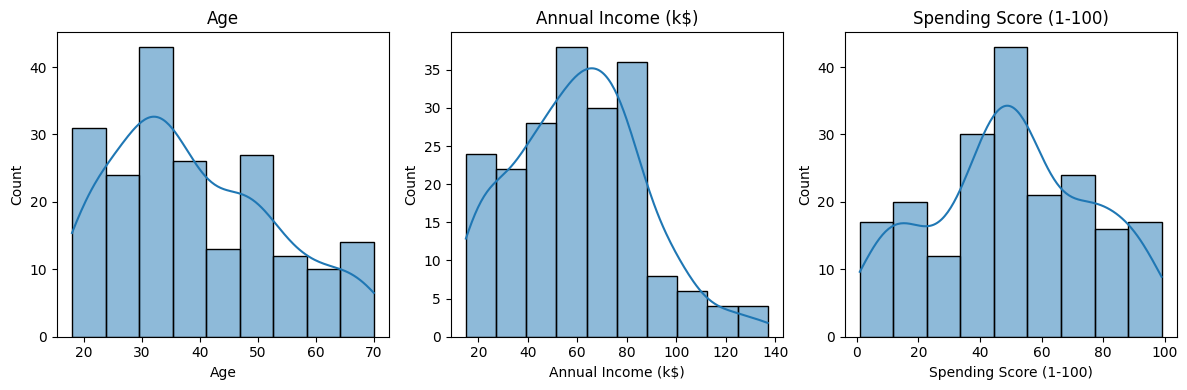

In [12]:
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

plt.figure(figsize=(12,4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

## **7. Korelasi dan Pairplot Sederhana**

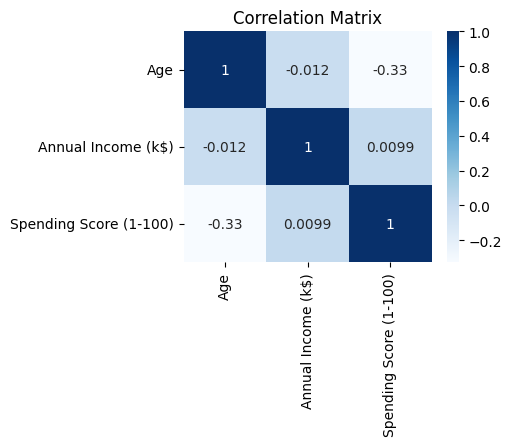

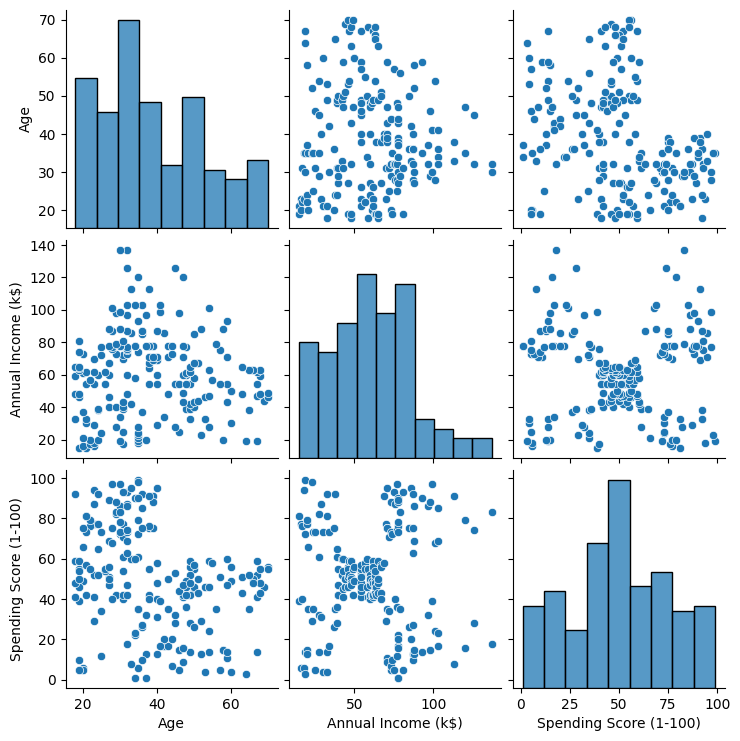

In [13]:
df_corr = df[num_cols].corr()
plt.figure(figsize=(4,3))
sns.heatmap(df_corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(df[num_cols])
plt.show()

## **8. Analisis Gender**

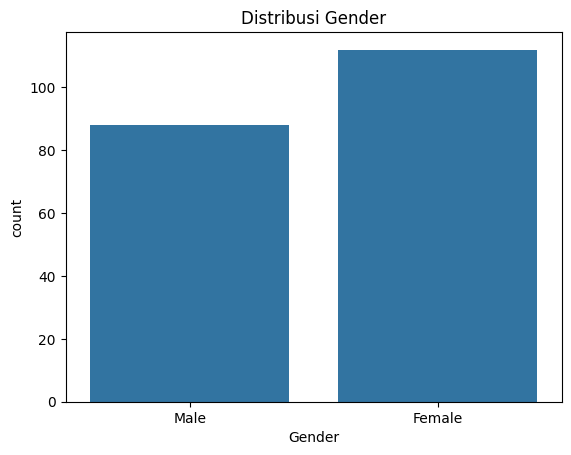

In [14]:
df['Gender'].value_counts()

sns.countplot(x='Gender', data=df)
plt.title('Distribusi Gender')
plt.show()

# **PREPROCESSING**

## **9. Pilih Fitur untuk Clustering**

In [15]:
df_ml = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df_ml.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## **10. Scaling**

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_ml)
X_scaled[:5]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

# **MODEL TRAINING (K-Means)**

## **11. Elbow Method**

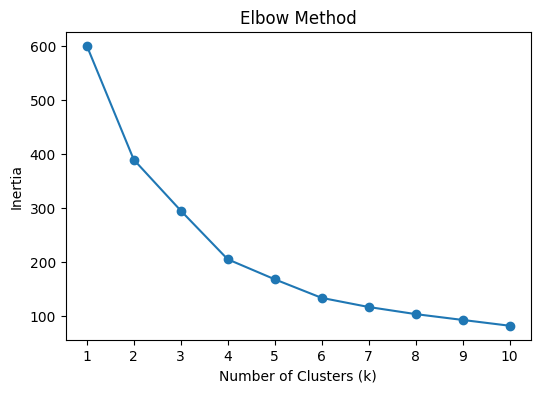

In [17]:
inertias = []
k_values = range(1, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_values, inertias, marker='o')
plt.xticks(k_values)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

## **12. Training K-Means Final (K=4)**

In [18]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


## **13. Ringkasan Tiap Cluster**

In [19]:
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


# **VISUALISASI**

## **14. Visualisasi Cluster**

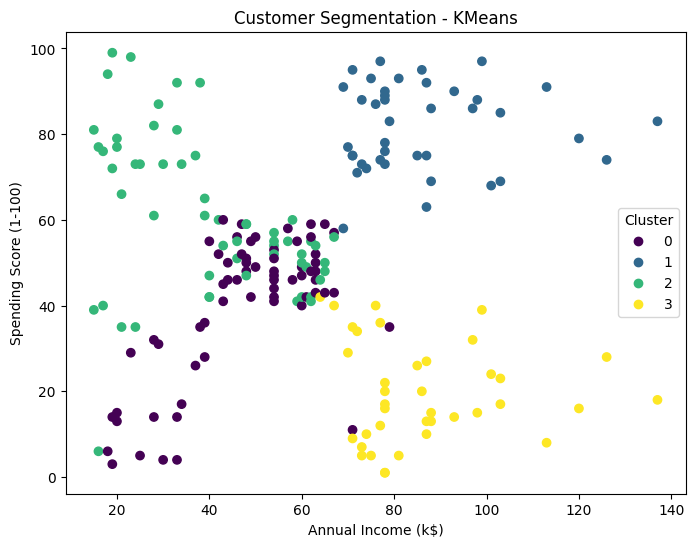

In [20]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['Cluster'],
    cmap='viridis'
)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation - KMeans')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.show()

## **15. Simpan Visualisasi untuk Web**

In [21]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['Cluster'],
    cmap='viridis'
)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation - KMeans')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.savefig('cluster_visualization.png', dpi=300, bbox_inches='tight')
plt.close()

# **EXPORT MODEL**

## **16. Export Model & Scaler**

In [22]:
joblib.dump(kmeans, 'cluster_model.pkl')
joblib.dump(scaler, 'scaler_cluster.pkl')

['scaler_cluster.pkl']